In [7]:
!pip install tensorflow==2.1
!pip install keras==2.3.1


  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [1]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D,Flatten,Dense
#from keras.optimizers import adam_v2

Using TensorFlow backend.


In [2]:
model=Sequential()
model.add(Conv2D(30,(3,3),input_shape=(64,64,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(15,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
#optimizer=adam_v2.Adam(learning_rate=0.01)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [3]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator#width_shift range-how much % shift width,height_shift_range etc
train_dataset=ImageDataGenerator(rescale=1/255)
test_dataset=ImageDataGenerator(rescale=1/255)
train=train_dataset.flow_from_directory("C:\\Users\\User\\Downloads\\ECG Images dataset of Cardiac Patients\\Train",target_size=(64,64),batch_size=32,class_mode="binary")
test=test_dataset.flow_from_directory("C:\\Users\\User\\Downloads\\ECG Images dataset of Cardiac Patients\\Test",target_size=(64,64),batch_size=32,class_mode="binary")
model.fit(train,steps_per_epoch=100,epochs=5,validation_data=test,validation_steps=100)

Found 478 images belonging to 2 classes.
Found 106 images belonging to 2 classes.
Epoch 1/5
100/100 [==============================] - 228s 2s/step - loss: 0.4126 - accuracy: 0.7844 - val_loss: 0.3220 - val_accuracy: 0.9811
Epoch 2/5
100/100 [==============================] - 213s 2s/step - loss: 0.0239 - accuracy: 0.9969 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 3/5
100/100 [==============================] - 202s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 9.0089e-04 - val_accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 201s 2s/step - loss: 5.0360e-04 - accuracy: 1.0000 - val_loss: 6.3950e-04 - val_accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 211s 2s/step - loss: 2.2723e-04 - accuracy: 1.0000 - val_loss: 4.4408e-04 - val_accuracy: 1.0000


In [4]:
import pandas as pd

In [5]:
metrics=pd.DataFrame(model.history.history)

In [6]:
metrics

,val_loss,val_accuracy,loss,accuracy
0,0.321996,0.981132,0.412594,0.784369
1,0.004329,1.000000,0.023973,0.996863
2,0.000901,1.000000,0.001646,1.000000
3,0.000640,1.000000,0.000504,1.000000
4,0.000444,1.000000,0.000228,1.000000


<AxesSubplot:>

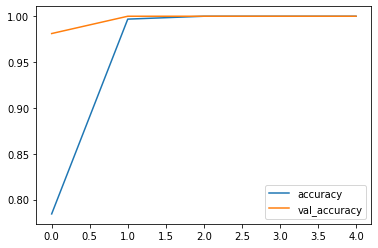

In [7]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

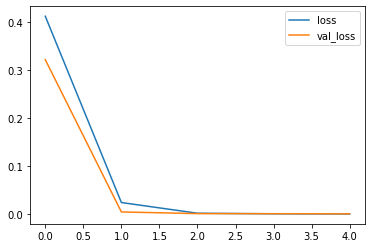

In [8]:
metrics[['loss','val_loss']].plot()

In [9]:
model.save('C:\\Users\\User\\Downloads\\ECG Images dataset of Cardiac Patients\\ecg_model1.h5')

In [10]:
import numpy as np
import cv2
from keras.preprocessing import image
test_img=image.load_img("C:\\Users\\User\\Downloads\\ECG Images dataset of Cardiac Patients\\ECG Images of Myocardial Infarction Patients (240x12=2880)\\MI(1).jpg",target_size=(64,64))
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
print(result)
if result[0][0]==0:
    prediction="heart blockage detected"
    print(prediction)
else:
    prediction="healthy heart"
    print(prediction)

[[0.]]
heart blockage detected


In [11]:
import numpy as np
import cv2
from keras.preprocessing import image
test_img=image.load_img("C:\\Users\\User\\Downloads\\ECG Images dataset of Cardiac Patients\\ECG Images of Myocardial Infarction Patients (240x12=2880)\\MI(25).jpg",target_size=(64,64))
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
print(result)
if result[0][0]==0:
    prediction="heart blockage detected"
    print(prediction)
else:
    prediction="healthy heart"
    print(prediction)

[[0.]]
heart blockage detected


In [13]:
import numpy as np
import cv2
from keras.preprocessing import image
test_img=image.load_img("C:\\Users\\User\\Downloads\\ECG Images dataset of Cardiac Patients\\Test\\normal\\Normal(227).jpg",target_size=(64,64))
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
print(result)
if result[0][0]==0:
    prediction="heart blockage detected"
    print(prediction)
else:
    prediction="healthy heart"
    print(prediction)

[[1.]]
healthy heart


In [14]:
import numpy as np
import cv2
from keras.preprocessing import image
test_img=image.load_img("C:\\Users\\User\\Downloads\\normal.jpg",target_size=(64,64))
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
print(result)
if result[0][0]==0:
    prediction="heart blockage detected"
    print(prediction)
else:
    prediction="healthy heart"
    print(prediction)

[[1.]]
healthy heart


In [16]:
import numpy as np
import cv2
from keras.preprocessing import image
test_img=image.load_img("C:\\Users\\User\\Downloads\\normal_heart_ecg.jpg",target_size=(64,64))
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
print(result)
if result[0][0]==0:
    prediction="heart blockage detected"
    print(prediction)
else:
    prediction="healthy heart"
    print(prediction)

[[1.]]
healthy heart


In [20]:
import numpy as np
import cv2
from keras.preprocessing import image
test_img=image.load_img("C:\\Users\\User\\Downloads\\image_ecg.jpg",target_size=(64,64))
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
print(result)
if result[0][0]==0:
    prediction="heart blockage detected"
    print(prediction)
else:
    prediction="healthy heart"
    print(prediction)

[[0.]]
heart blockage detected


In [24]:
import numpy as np
import cv2
from keras.preprocessing import image
test_img=image.load_img("C:\\Users\\User\\Downloads\\heartblock.jpg",target_size=(64,64))
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
print(result)
if result[0][0]==0:
    prediction="heart blockage detected"
    print(prediction)
else:
    prediction="healthy heart"
    print(prediction)

[[1.]]
healthy heart
